# Arrays and Strings

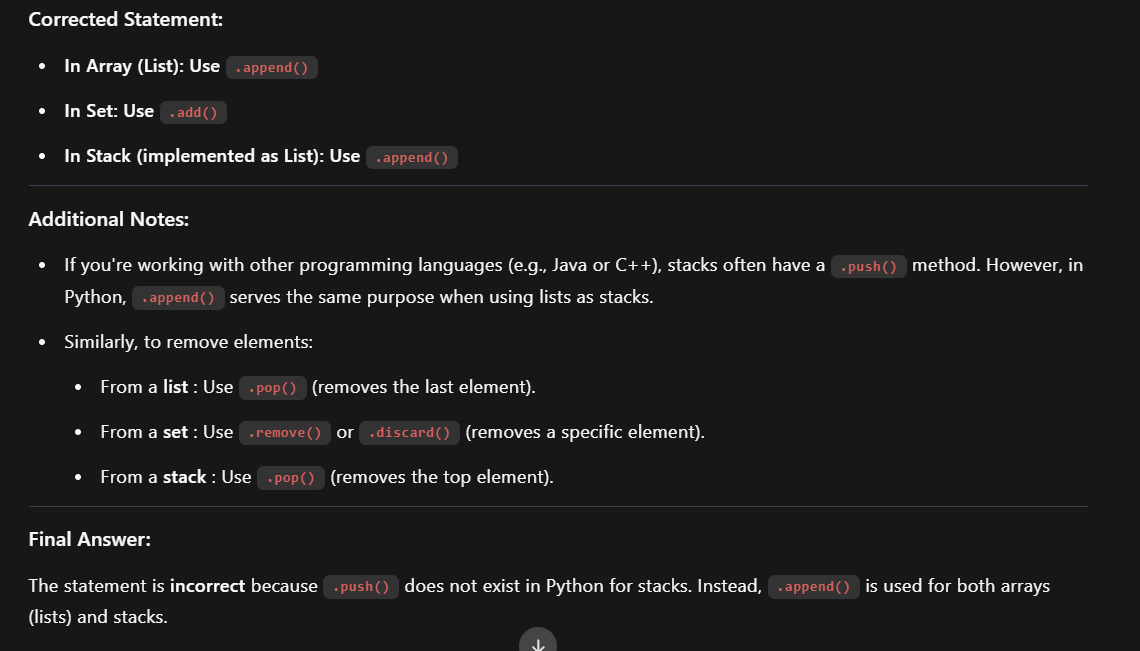

In [ ]:
# In Array -->  .append() and in SET you do --> .add and there is nothing called as--> .push in python
# ALso Array is list and stack is also a list
# for HashMap you use simple " for i in s: " and not the for with range


# Define the array
arr = [3, 5, 6, 7]

# Iterate over indices
for i in range(len(arr)):
  print(i)

# Iterate over values
for i in arr:
  print(i)

# Iterate over index-value pairs
for i, value in enumerate(arr):
  print(i, value)

# Append a new value
arr.append(8)
print(arr)  # Output: [3, 5, 6, 7, 8]

# Remove a value
arr.remove(5)
print(arr)  # Output: [3, 6, 7, 8]

# Sorting a list of numbers
numbers = [5, 2, 8, 1, 9]
num2 = [9, 50, 20, 80, 10, 90]

numbers.sort()
x = sorted(num2)

print("Sorted numbers:", numbers)  # Output: [1, 2, 5, 8, 9]
print("num2 sorted x:",x)

# If you use only `.append()` and `.pop()` on a Python list, you're effectively treating it as a stack.
# By restricting operations to these, the list functions as a stack else if you use all the other like insert remove etc
# then it will consider as array

my_list.append(4)  # After append(4): [1, 2, 3, 4] # Adds an element to the end of the list

my_list.insert(1, 9)  # After insert(1, 9): [1, 9, 2, 3, 4] # Inserts an element at a specific position

last_element = my_list.pop()  # After pop(): [1, 9, 2, 3], Popped element: 4 # Removes and returns the last element (or an element at a given index)

my_list.remove(9)  # After remove(9): [1, 2, 3] # Removes the first occurrence of a specific value

mapObj.items() # this returns the tuple

0
1
2
3
3
5
6
7
0 3
1 5
2 6
3 7
[3, 5, 6, 7, 8]
[3, 6, 7, 8]
Sorted numbers: [1, 2, 5, 8, 9]
num2 sorted x: [9, 10, 20, 50, 80, 90]


NameError: name 'my_list' is not defined

### 1. Contains Duplicate
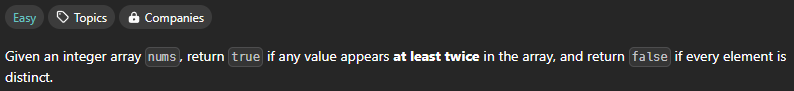

In [ ]:
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        hashset = set()

        for i in nums:
            if i in hashset:
                return True
            hashset.add(i)
        return False


### 2. Is anargram

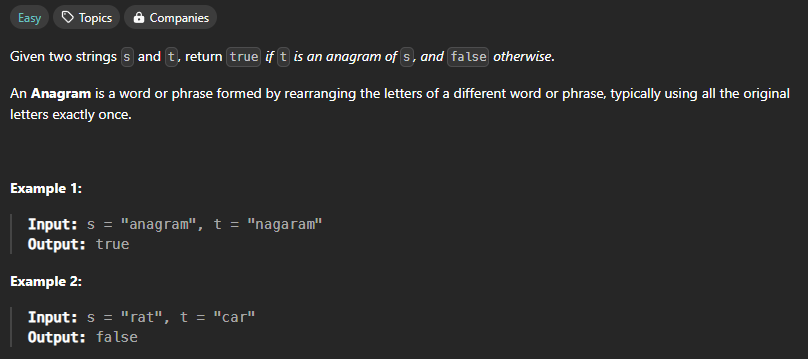

In [ ]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        countS, countT = {}, {}

        if (len(s) != len(t)):
            return False

        for i in range(len(s)):
            countS[s[i]] = 1 + countS.get(s[i], 0)
            countT[t[i]] = 1 + countT.get(t[i], 0)
        return countS == countT

### 3. Two Sum

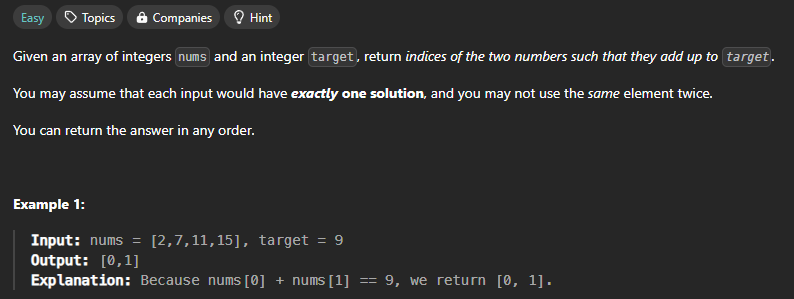

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        map = {}

        for i,n in enumerate(nums):
            diff = target - n
            if diff in map:
                return [map[diff], i]
            map[n] = i
        return
    
### second way
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        map = {}

        for i in range(len(nums)):
            diff=target-nums[i]

            if diff in map:
                return[map[diff],i]

            map[nums[i]]=i
                

### 4. Group Anagram

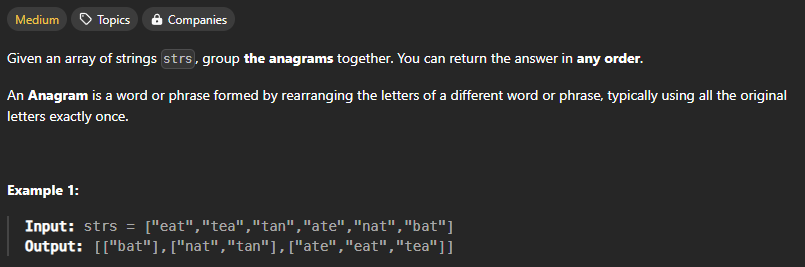

In [ ]:
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        anagrams = defaultdict(list) ##= default list is from collections and it helps to keep default value even if somehting is not there, so if you try d['a'].append(1), then it will add a:1 wihtout your need to chek whether a existing in 'd' or not
        
        for s in strs:
            # Sort the string and use it as the key
            sorted_str = tuple(sorted(s)) # so here we just sort the letter in current particular word and then wrap it inside tuple , why tuple boz they are immutable adn immutablity is required property for a person to be key in dictonray, so to have immutable property of that key we need to make the the sorted arrya/list in tuuple, so that we can use in next line
            anagrams[sorted_str].append(s)
        
        # Return the values of the dictionary
        return list(anagrams.values())

### 5. Top K elements

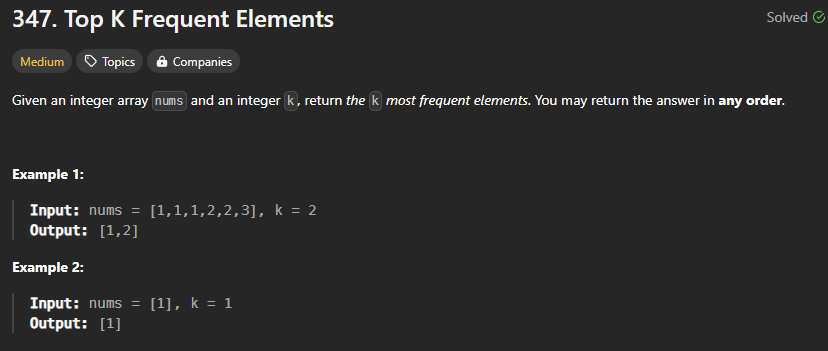

In [ ]:
# First appraoch since we use sorting we have TC - O(nlog n)
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        mapObj = {}

        for i in nums:
            mapObj[i] = mapObj.get(i, 0) + 1

        mapObj = sorted(mapObj.items(), key=lambda item: item[1], reverse=True)

        ans = []

        for i in range(k):
            ans.append(mapObj[i][0])
        
        return ans
    
# Second approach using heap data structure with min-heap since we want to get smallest k elements, so we have TC - O(nlog k)

import heapq

class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        # Step 1: Count the frequency of each number
        map = {}
        for num in nums:
            map[num] = map.get(num, 0) + 1

        # Step 2: Use a min-heap to keep track of the top k frequent elements
        heap = []
        for num, freq in map.items():
            heapq.heappush(heap, (freq, num))
            if len(heap) > k:  # Maintain only the top k elements
                heapq.heappop(heap)

        # Step 3: Extract the numbers from the heap
        result = [num for (freq, num) in heap]
        return result
    
# Thirs approach - Bucket sort - O(n)
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        # Step 1: Count the frequency of each number
        map = {}
        for num in nums:
            map[num] = map.get(num, 0) + 1

        # Step 2: Create buckets for frequencies
        buckets = [[] for _ in range(len(nums) + 1)]
        for num, freq in map.items():
            buckets[freq].append(num)

        # Step 3: Extract the top k frequent elements
        result = []
        for i in range(len(buckets) - 1, -1, -1):
            if buckets[i]:
                result.extend(buckets[i])
                if len(result) >= k:
                    break

        return result[:k]

In [ ]:
### Longest consecutive sequence
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        numsSet = set(nums)

        longest = 0

        for i in nums:
            if (i-1) not in numsSet:
                length = 0
                while (i+length) in numsSet:
                    length += 1
                longest = max(length, longest)

        return longest


In [ ]:
### Valid sudoku
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        cols = collections.defaultdict(set)
        rows = collections.defaultdict(set)
        squares = collections.defaultdict(set)  # key = (r /3, c /3)

        for r in range(9):
            for c in range(9):
                if board[r][c] == ".":
                    continue
                if (
                    board[r][c] in rows[r]
                    or board[r][c] in cols[c]
                    or board[r][c] in squares[(r // 3, c // 3)]
                ):
                    return False
                cols[c].add(board[r][c])
                rows[r].add(board[r][c])
                squares[(r // 3, c // 3)].add(board[r][c])

        return True


In [ ]:
### Product of Array Except self
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        n = len(nums)
        
        # Initialize the answer array where each element is kept to 1
        answer = [1] * n
        
        # Step 1: Compute prefix products, Initialize prefix_product to 1
        prefix_product = 1
        for i in range(n):
            # Set answer[i] to the current prefix_product
            answer[i] = prefix_product # different from line in suffix sum right, boz suffix works on array which is already modified by prefix, in suffix you do ans[i] *= suffix so that you do not overwrite the  prefix calculation and we did not so this ins prefix n=boz prefix is the first thing which will be filled hence we do not worry to over wwrite ob=ver anything hence we direct set valur in ans array but since you know that in ans we have all 1's so you can do this as well in ans[i] *= prefix in prefix as well it wont matter since all existing were 1
            # Update prefix_product by multiplying with nums[i]
            prefix_product *= nums[i]
        
        # Step 2: Compute suffix products and finalize the result
        # Initialize suffix_product to 1
        suffix_product = 1
        for i in range(n - 1, -1, -1):
            answer[i] *= suffix_product
            # Update suffix_product by multiplying with nums[i]
            suffix_product *= nums[i]
        
        return answer
    


# 250 Question -------------------------------

In [ ]:
# 1. Concatenation of array

### First way (Self sloved)
class Solution:
    def getConcatenation(self, nums: List[int]) -> List[int]:
        ans = nums[:]
        for i in nums:
            ans.append(i)
            
        return ans
    
### Second way (online solution)
class Solution:
    def getConcatenation(self, nums: List[int]) -> List[int]:
        return nums + nums




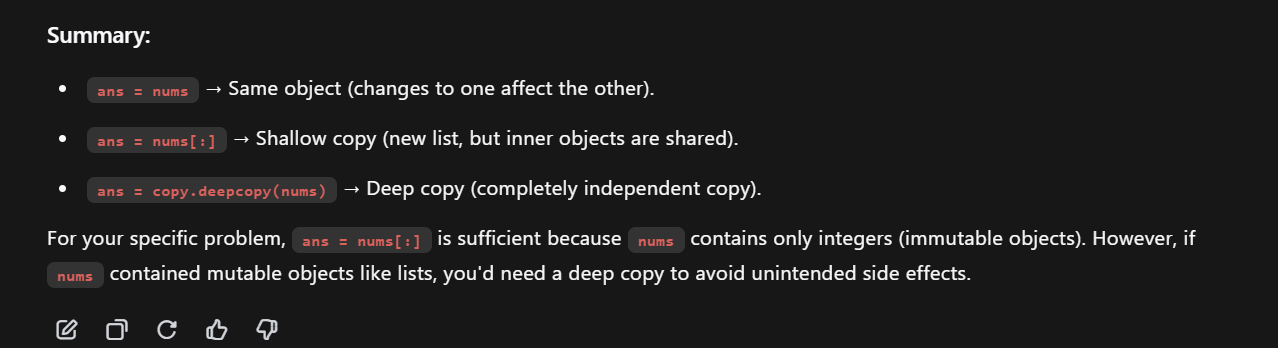

In [ ]:
# 2.Contain duplicate

### First way (slef solved) - uses Hash Map
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        map = {}

        for i in nums:
            if i in map:
                return True
            else:
                map[i] = i   #<----- look this

        return False

### Second way (online) - Uses Hash set
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        seen = set()
        for num in nums:
            if num in seen:
                return True
            seen.add(num) #<----- look this
        return False


In [ ]:
# 3. Anagram

### First way (slef solved) - uses Hash Map
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        mapS = {}
        mapT = {}

        for i in s:
            mapS[i] = mapS.get(i, 0) + 1 #<-----look this

        for i in t:
            mapT[i] = mapT.get(i, 0) + 1

        return mapS == mapT
    
    ### Second way (online)
    class Solution:
        def isAnagram(self, s: str, t: str) -> bool:
            if len(s) != len(t):
                return False

            countS, countT = {}, {}

            for i in range(len(s)):
                countS[s[i]] = 1 + countS.get(s[i], 0) #<---- look this
                countT[t[i]] = 1 + countT.get(t[i], 0)
            return countS == countT

In [ ]:
# 4. Longest prefix in string arrray 
#[flower, flow, flight] ==ans is ===> ['fl'] # since 'fl' is the only common prefic in all strings

class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:
        if not strs:
            return ""

        res = ""
        
        # Iterate through each character index of the first string
        for i in range(len(strs[0])):
            # Compare the character at index `i` of the first string with all other strings
            for s in strs:
                # Stop if we reach the end of any string or find a mismatch
                if i == len(s) or s[i] != strs[0][i]:  # boz when index will be same as len then one will be out of bound
                    return res
            # If all strings match at index `i`, add the character to the result
            res += strs[0][i]
        
        return res

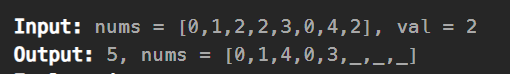

In [ ]:
# 8. Count number of unwanted element in array IN PPLACE OPERATION -- See Image up
class Solution:
    def removeElement(self, nums: List[int], val: int) -> int:
        k = 0

        for i in range(len(nums)):
            if nums[i] != val:
                nums[k] = nums[i]
                k += 1
        
        return k
